# Worksheet 21

Name: Ruihang Liu
UID: U49596386

### Topics

- Logistic Regression

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

/Users/henryliu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


a) Using the above code, generate and plot data that is linearly separable.

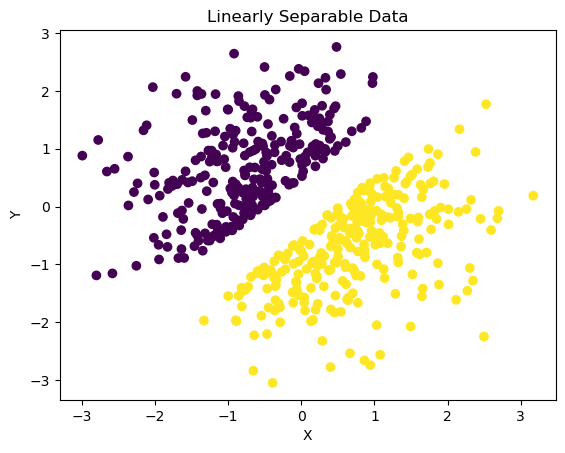

In [2]:
X, Y = generate_line_data()

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linearly Separable Data')
plt.show()


b) Fit a logistic regression model to the data a print out the coefficients.

In [3]:
model = LogisticRegression().fit(X, Y)
model.coef_

array([[ 4.11337993, -4.10105513]])

In [4]:
model.intercept_

array([0.05839469])

c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

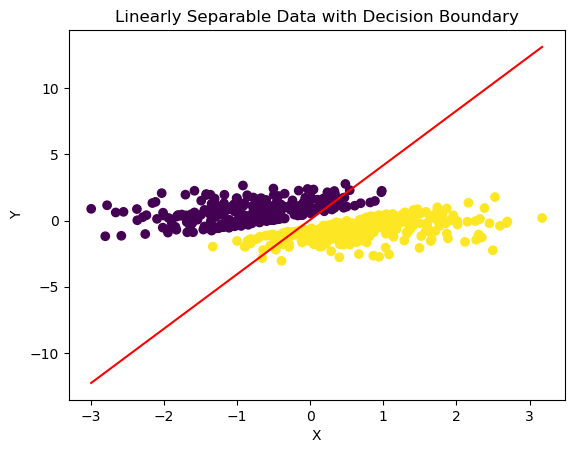

In [5]:
# Get the coefficients from the logistic regression model
slope = model.coef_[0][0]
intercept = model.intercept_

# Generate x values for the line
x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

# Calculate y values for the line
y_line = slope * x_line + intercept

# Plot the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=Y)

# Plot the line
plt.plot(x_line, y_line, color='red')

# Set the labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linearly Separable Data with Decision Boundary')

# Show the plot
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

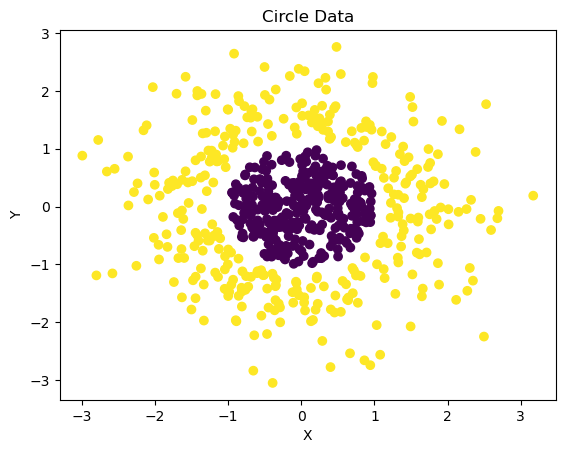

In [6]:
X, Y = generate_circle_data(t)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Circle Data')
plt.show()


e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Transform X using PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_transformed = poly.fit_transform(X)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_transformed, Y)

LogisticRegression()

f) Plot the decision boundary using the code below.

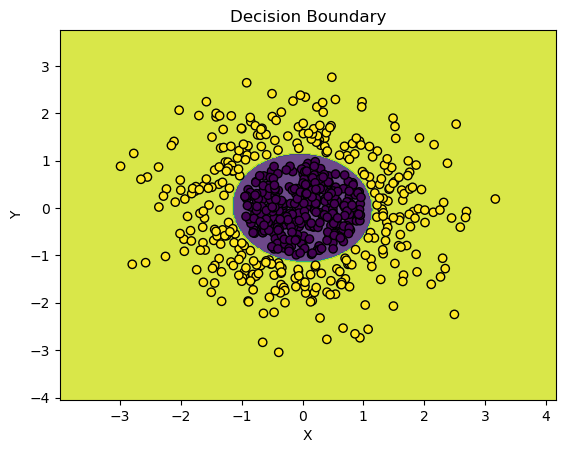

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Transform the meshgrid points using PolynomialFeatures
Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))

# Reshape the predicted class to match xx
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary')
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

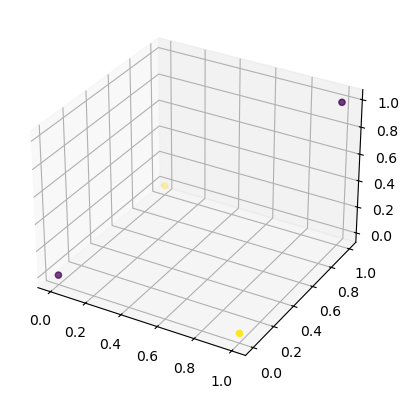

In [9]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = generate_xor_data()
ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

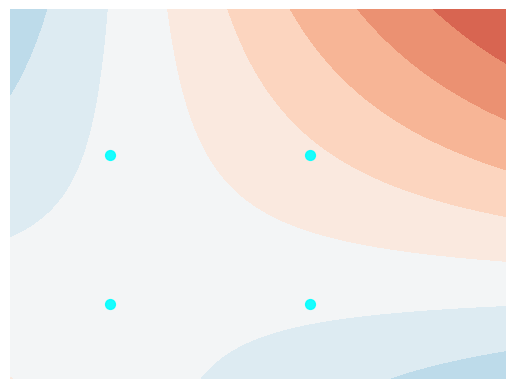

In [10]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

In [11]:
!conda install -y ipympl

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.



In [12]:
from tqdm import tqdm

  0%|          | 0/20000 [00:00<?, ?it/s]

100%|██████████| 20000/20000 [01:24<00:00, 235.99it/s]


[[ 0.04307198  0.04306862 -0.43033115]]
[0.06381617]


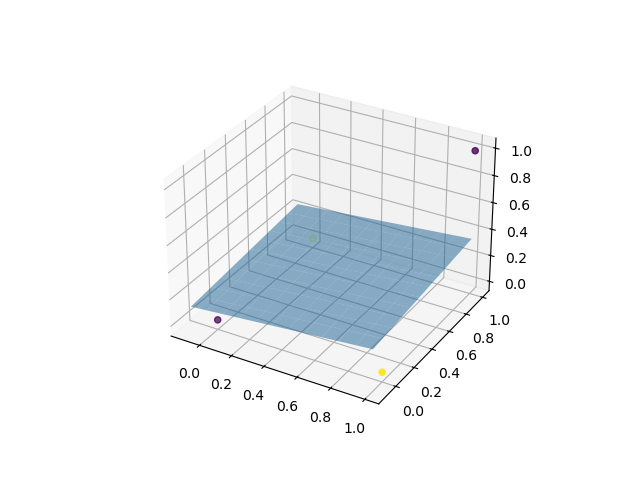

In [13]:
%matplotlib widget
for i in tqdm(range(20000)):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        # print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

In [14]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2,
                                random_state=0)

# CIRCLES
def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X, Y = generate_circles_data(t)

poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=2)
model = make_pipeline(poly, lr).fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54575D+03    |proj g|=  2.20592D+03

At iterate    1    f=  1.25980D+03    |proj g|=  7.85645D+02

At iterate    2    f=  1.16386D+03    |proj g|=  4.67390D+02

At iterate    3    f=  1.12014D+03    |proj g|=  8.53618D+02

At iterate    4    f=  1.07857D+03    |proj g|=  2.28644D+02

At iterate    5    f=  1.03868D+03    |proj g|=  2.46093D+02

At iterate    6    f=  8.75292D+02    |proj g|=  2.23884D+02

At iterate    7    f=  6.72984D+02    |proj g|=  1.69393D+02

At iterate    8    f=  4.06106D+02    |proj g|=  3.22571D+02

At iterate    9    f=  3.84632D+02    |proj g|=  4.67515D+02

At iterate   10    f=  2.26564D+02    |proj g|=  2.61932D+02

At iterate   11    f=  1.84398D+02    |proj g|=  1.15386D+02

At iterate   12    f=  1.54569D+02    |proj g|=  6.06745D+01

At iterate   13    f=  1.3

/Users/henryliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [15]:
for i in tqdm(range(20000)):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        # print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

100%|██████████| 20000/20000 [07:44<00:00, 43.09it/s]

[[ 0.02184314  0.0110172   0.00142197]
 [ 0.0196463  -0.0145403   0.00680101]
 [-0.04148944  0.0035231  -0.00822298]]
[-0.3925803   0.26777485  0.12480545]


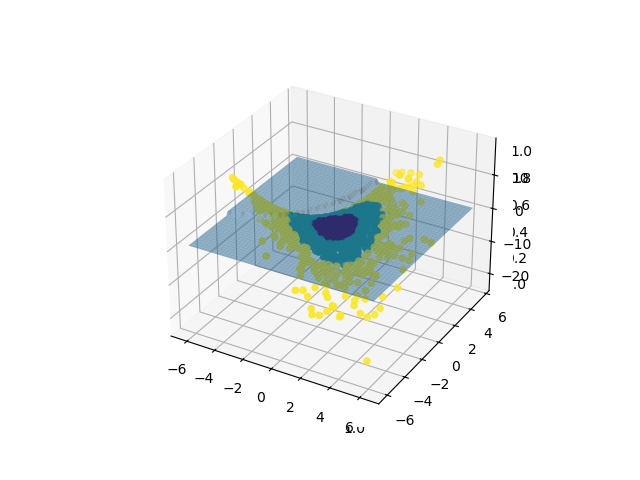

In [16]:
# Create a meshgrid of points
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Transform the meshgrid points using PolynomialFeatures
Z = model.predict(PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(np.c_[xx.ravel(), yy.ravel()]))

# Reshape the predicted class to match xx
Z = Z.reshape(xx.shape)

# Plot the decision boundary in 3D
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 0]*X[:, 1], c=Y)
ax.plot_surface(xx, yy, Z, alpha=0.5)
plt.show()

The last 3D image (or JSON) somehow has saving issues.
But here's it is:

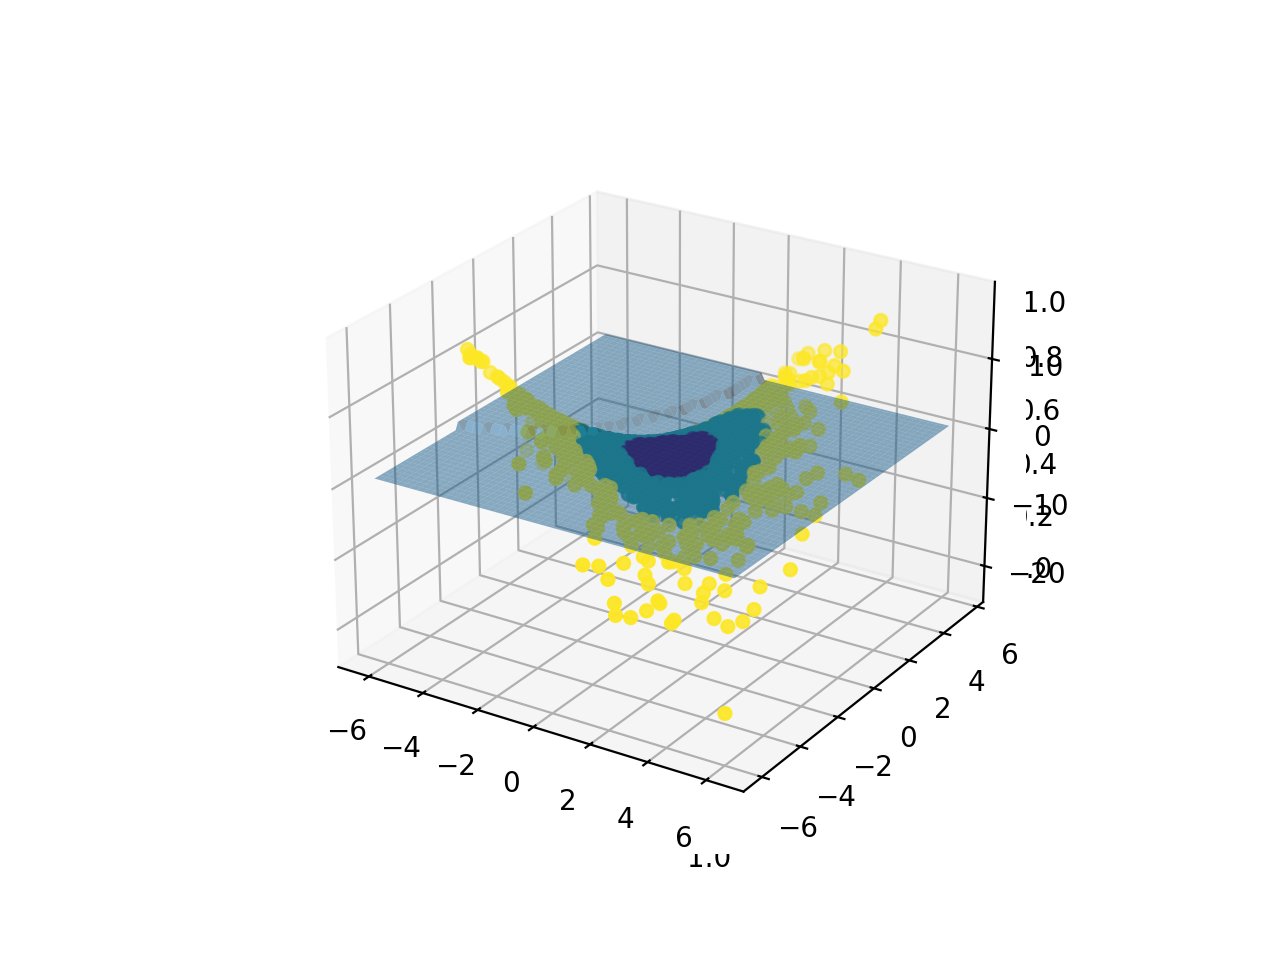

In [17]:
from IPython.display import Image
Image(filename="3DView.png", width=500, height=300)

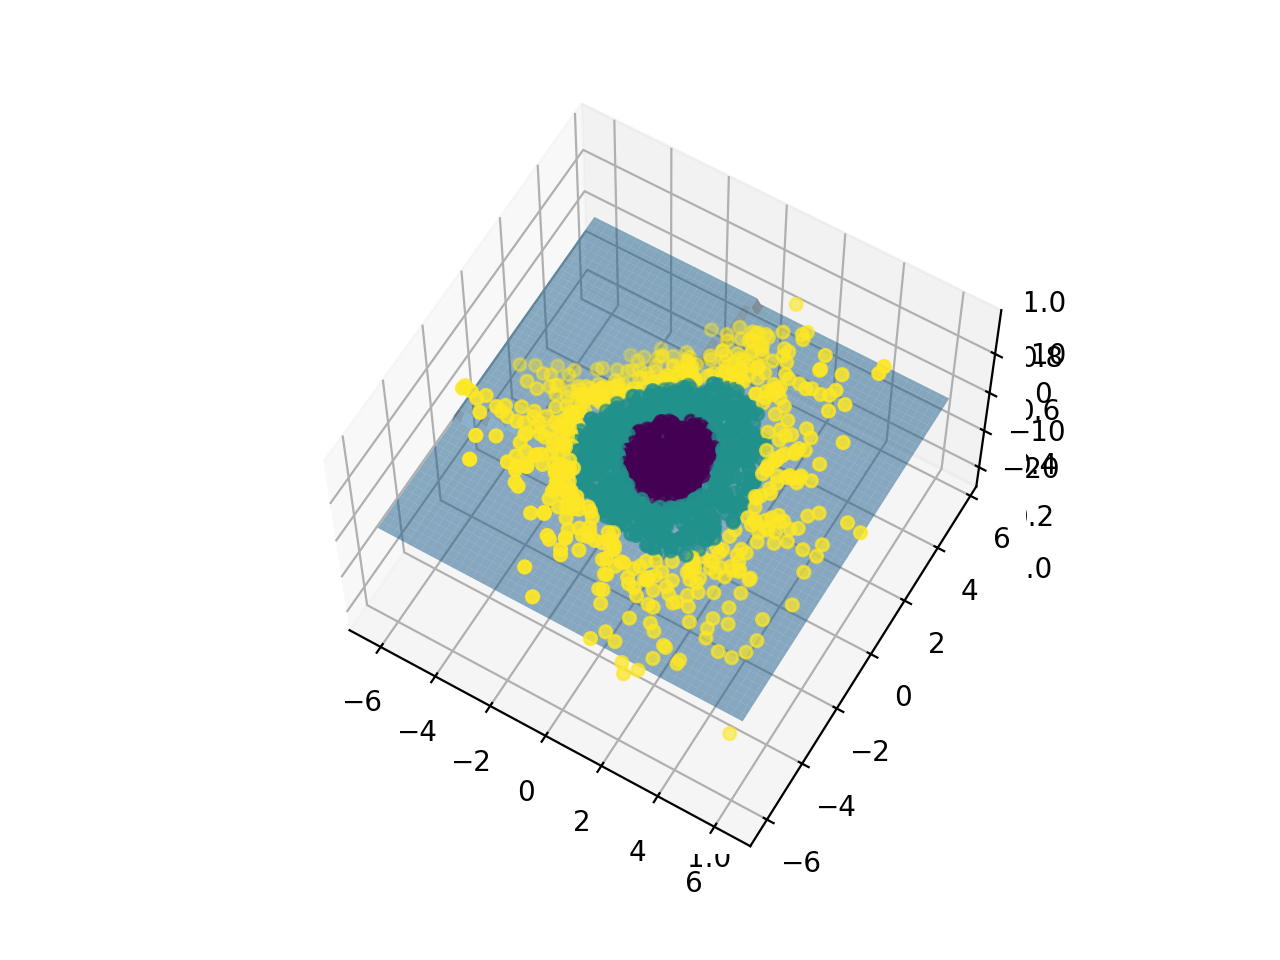

In [18]:
from IPython.display import Image
Image(filename="BirdView.png", width=500, height=300)